# Síntesis de funciones de excitación RC-RL
<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 
Se presentan los métodos de Foster y Cauer para la síntesis de redes no disipativas. Ambos métodos nos permitirán implementar cualquier función de excitación, real y positiva (FRP), en una red eléctrica canónica, es decir, con la menor cantidad posible de componentes.
* Funciones de dibujo de redes: [dibujar_foster_serie](), [dibujar_foster_derivacion](), [dibujar_cauer_LC]()
* Funciones de síntesis de dipolos: [cauer_LC](), [foster]()
* Funciones para presentación de markdown y latex: [print_latex](), [print_subtitle](), [a_equal_b_latex_s]()


### Introducción a las funciones de excitación RC-RL

Se extiende ahora el estudio a las funciones de exitación (FE) compuestas **solamente** por dos elementos, siendo uno de ellos necesariamente disipativo. Esto significa redes  RC ó RL, cuya inmitancia seguirá siendo $F(s)$. En este documento se ananalizan solo las redes RC, ya que han tenido mayor importancia tecnológica, pero las RL pueden comprenderse mediante las siguientes dualidad:

* $Z_{RC} \sim Y_{RL}$
* $Z_{RL} \sim Y_{RC}$

es decir que se puede pensar en una $Z_{RC}$ *a la Foster*

$$ Z_{RC}(s)= \frac{k_0}{s} + k_\infty + \sum_{i=1}^N\frac{k_i}{s+\sigma_i^2} $$

o una $Y_{RC}$

$$ Y_{RC}(s)= k_0 + k_\infty.s + \sum_{i=1}^N\frac{k_i.s}{s+\sigma_i^2} $$

dichas expresiones tienen implicancias circuitales que conviene tenerlas presentes antes de continuar con los siguientes ejemplos. Se refiere al lector interesado al cap. 4 del libro de Araujo *Síntesis de redes lineales*, o a *Network Synthesis* de Franklin Kuo.

La expansión en fracciones continuas del método de Cauer también dará lugar a redes escalera como pronto se mostrará.


In [1]:

import sympy as sp

# Ahora importamos las funciones de PyTC2

from pytc2.sintesis_dipolo import cauer_RC, foster, foster_zRC2yRC
from pytc2.dibujar import dibujar_cauer_RC_RL, dibujar_foster_derivacion, dibujar_foster_serie
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown


In [2]:
# Resolución simbólica
s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
ZRC = (s**2 + 4*s + 3)/(s**2 + 2*s)
YRC = 2*(s**2 + 4*s + 3)/(s**2 + 8*s + 12)

print_latex(a_equal_b_latex_s('Z_{RC}(s)', ZRC))
print_latex(a_equal_b_latex_s('Y_{RC}(s)', YRC))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
# Se expande ZRC a la Foster
k0, koo, ki_wi, kk, ZRC_foster = foster(ZRC)

print_latex(a_equal_b_latex_s('k_0', k0))

print_latex(a_equal_b_latex_s(r'k_1 = \left[\left[  \frac{1}{k_1}, \frac{\sigma_1^2}{k_1} \right]\right]', ki_wi ))

print_latex(a_equal_b_latex_s('k_k', kk))

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z_{RC}(s)', ZRC)[1:-1], ZRC_foster ))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Foster serie

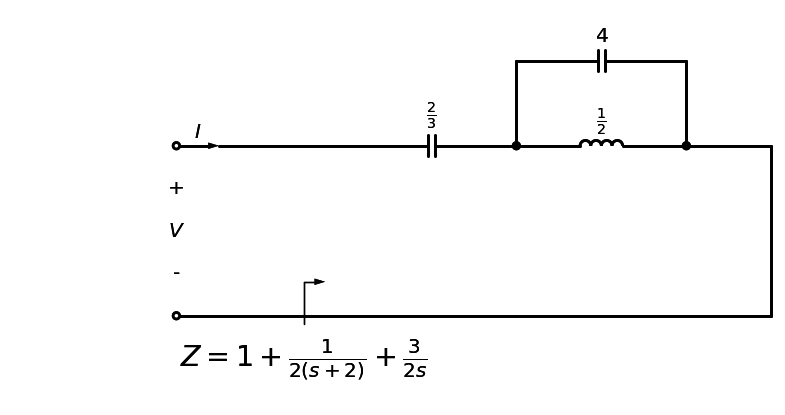

In [4]:
print_subtitle('Foster serie')

# Tratamos a nuestra función imitancia como una Z
dibujar_foster_serie(k0, koo, ki_wi, z_exc = ZRC_foster)




In [5]:
# Se expande YRC a la Foster. Notar que se expande YRC/s, como si fuera ZRC. (Ver Kuo 331)
k0, koo, ki_wi, kk, YRC_foster = foster(YRC/s)

# Luego lo multiplicamos por s para obtener la YRC original.
k0, koo, ki_wi, kk, YRC_foster = foster_zRC2yRC(k0, koo, ki_wi, kk, YRC_foster)

print_latex(a_equal_b_latex_s('k_0', k0))

print_latex(a_equal_b_latex_s(r'k_1 = \left[\left[  \frac{1}{k_1}, \frac{\sigma_1^2}{k_1} \right]\right]', ki_wi ))

print_latex(a_equal_b_latex_s('k_k', kk))

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Y_{RC}(s)', YRC)[1:-1], YRC_foster ))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Luego queda solo implementar la inmitancia como impedancia o admitancia. Para ello se dispone de funciones de dibujo de redes:

Como se puede ver, la suma de términos simples, resulta en que cada término será una impedancia asociada en serie. Luego si se asume F(s) como admitancia Y(s), la red resultante estará asociada en paralelo.

In [6]:
print_subtitle('Foster derivación')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Y(s)=F(s)', FF)[1:-1], FF_foster ))

# Tratamos a nuestra función imitancia como una Y
dibujar_foster_derivacion(k0, koo, ki_wi, y_exc = FF)



#### Foster derivación

NameError: name 'FF' is not defined

Como puede verse, el método de Foster da lugar a redes con $2.1 + 2 = 4$ componentes reactivos en ambos casos. Se dice que es un método **canónico** dado que 4 es la menor cantidad de componentes con la que la función F(s) puede ser implementada con elementos pasivos.


### Expansión en fracciones continuas: Método de Cauer

Del mismo modo que el método de Foster se sutenta en la expansión en fracciones simples, el de Cauer consiste en la expansión en [fracciones continuas](https://en.wikipedia.org/wiki/Network_synthesis#Cauer_synthesis). Con la salvedad que puede representarse la expansión mediante residuos $k_0$ y $k_\infty$.

$$ F(s)= \frac{k_0}{s} + \frac{1}{ \frac{k_1}{s} + \frac{1}{ \frac{k_2}{s} + \cdots } } = 
         k_{\infty,1}.s + \frac{1}{ k_{\infty,2}.s + \frac{1}{ k_{\infty,3}.s + \cdots } } $$

en este caso cualquiera de ambas expansiones da lugar a redes escalera, por ejemplo si se tratara de una impedancia:

$$ Z(s)= \frac{1}{s.C_1} + \frac{1}{ \frac{1}{s.L_1} + \frac{1}{ \frac{1}{s.C_2} + \cdots } } = 
         s.L_1 + \frac{1}{ s.C_1 + \frac{1}{ s.L_2 + \cdots } } $$

o de una admitancia:

$$ Y(s)= \frac{1}{s.L_1} + \frac{1}{ \frac{1}{s.C_1} + \frac{1}{ \frac{1}{s.L_2} + \cdots } } = 
         s.C_1 + \frac{1}{ s.L_1 + \frac{1}{ s.C_2 + \cdots } } $$

se ve claramente como una función de inmitancia da lugar a 4 redes diferentes. Analizaremos la siguiente función de inmitancia


In [ ]:
from pytc2.sintesis_dipolo import cauer_LC
from pytc2.dibujar import dibujar_cauer_LC


# Sea la siguiente función de excitación
FF = (2*s**4 + 20*s**2 + 18)/(s**3 + 4*s)

print_latex(a_equal_b_latex_s('F(s)', FF))



## Cauer 1: remociones en $\infty$

Se comienza con la primera forma del método, es decir cuando se realizan remociones de los residuos en infinito.

In [ ]:

# Implementaremos FF mediante Cauer 1 o remociones continuas en infinito
koo, F_cauer_oo, rem = cauer_LC(FF, remover_en_inf=True)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('F(s)', FF)[1:-1], F_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(koo, z_exc = F_cauer_oo)

# Tratamos a nuestra función inmitancia como una Y
dibujar_cauer_LC(koo, y_exc = F_cauer_oo)



Se observa, como es de esperarse, que interpretar la inmitancia como impedancia o admitancia utilizando el mismo método, Cauer 1 en este caso, da lugar a redes **duales**.

## Cauer 2: remociones en 0 o DC

Repetimos ahora para remociones de los residuos en 0 Hz, obtendremos dos redes también duales.

In [ ]:

# Implementaremos F mediante Cauer 2 o remociones continuas en cero
k0, F_cauer_0, rem = cauer_LC(FF, remover_en_inf=False)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('F(s)', FF)[1:-1], F_cauer_0 ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(k0, z_exc = F_cauer_0)

# Tratamos a nuestra función inmitancia como una Y
dibujar_cauer_LC(k0, y_exc = F_cauer_0)



Ambas redes duales, tienen características en común como ser que ambas tienen capacitores en serie e inductores en derivación. Esto contrasta con las redes halladas mediante Cauer 1, donde observamos lo contrario: inductores en serie y capacitores en derivación. Está claro que Cauer 1 da lugar a redes que, en caso **que imaginemos un puerto de salida en el extremo derecho de la red**, serían filtros **pasabajo**, mientras que sintetizar una red mediante Cauer 2 da lugar a una red escalera **pasa-altos**.

Finalmente, decir que habrá redes que al tener la misma función de exitación, cargarán de forma idéntica al puerto de entrada, pero en caso de asumir una eventual transferencia respecto a un puerto en el otro extremo de la red, la transferencia **será complementaria** (pasabajo-pasaalto):

In [ ]:
# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(koo, z_exc = F_cauer_oo)

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(k0, z_exc = F_cauer_0)
